# Hyperparameters Tuning and Best options

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("World Energy Consumption.csv")
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [3]:
df["Total Electricity"] = (
    df["biofuel_electricity"] +
    df["electricity_generation"] +
    df["fossil_electricity"] +
    df["gas_electricity"] +
    df["hydro_electricity"]
)

df = df[df["year"] == 2000]
df = df[['population', 'gdp', 'Total Electricity']]
df.dropna(inplace = True)
df

,population,gdp,Total Electricity
123,1.954299e+07,1.128379e+10,0.94
566,3.182027e+06,1.521426e+10,9.38
688,3.077462e+07,2.085541e+11,69.45
853,1.639407e+07,2.351202e+10,2.80
1060,3.707077e+07,5.364810e+11,210.45
...,...,...,...
21296,7.900114e+07,2.196489e+11,57.48
21609,6.148899e+09,5.986666e+13,30032.65
21652,1.862870e+07,7.775042e+10,6.42
21867,9.891140e+06,1.496412e+10,15.52


In [4]:
median_electricity = df['Total Electricity'].mean()
df['class'] = df['Total Electricity'].apply(lambda x : 0 if x < median_electricity else 1)
df

,population,gdp,Total Electricity,class
123,1.954299e+07,1.128379e+10,0.94,0
566,3.182027e+06,1.521426e+10,9.38,0
688,3.077462e+07,2.085541e+11,69.45,0
853,1.639407e+07,2.351202e+10,2.80,0
1060,3.707077e+07,5.364810e+11,210.45,0
...,...,...,...,...
21296,7.900114e+07,2.196489e+11,57.48,0
21609,6.148899e+09,5.986666e+13,30032.65,1
21652,1.862870e+07,7.775042e+10,6.42,0
21867,9.891140e+06,1.496412e+10,15.52,0


In [5]:
from sklearn.model_selection import train_test_split

X = df[["population", "gdp"]]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130, 2) (130,)
(33, 2) (33,)


In [7]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import validation_curve

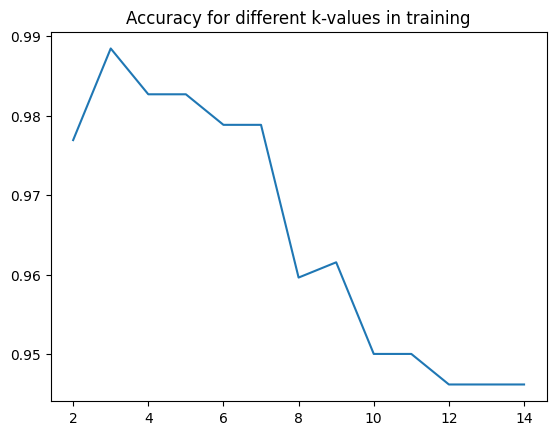

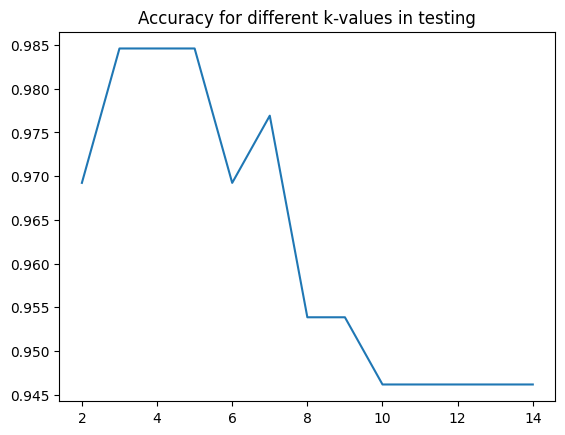

In [8]:
# Classifier 1: KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

values = np.arange(2, 15)
train_scores, test_scores = validation_curve(
    KNN(), X_train, y_train, param_name='n_neighbors', param_range=values, cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(values, train_mean)
plt.title("Accuracy for different k-values in training")
plt.show()

plt.plot(values, test_mean)
plt.title("Accuracy for different k-values in testing")
plt.show()

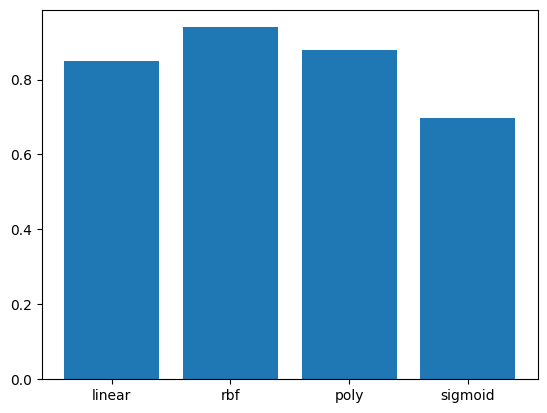

In [9]:
from sklearn.svm import SVC

values = [("linear", -1), ("rbf", -1), ("poly", 5), ("sigmoid", -1)]

accuracies = []

for kernel, deg in values:
    if deg == -1:
        model = SVC(kernel = kernel)
    else:
        model = SVC(kernel = kernel, degree=deg)
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)

kernels = [value[0] for value in values]
plt.bar(kernels, accuracies)
plt.show()
        

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# MLP Model
def create_model():
    model = Sequential([
        Dense(64, activation= 'relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation = 'relu'),
        Dense(1, activation="sigmoid")
    ])

    return model

In [12]:
values = []

In [13]:
# Full gradient Descent
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=X_train.shape[0], validation_split=0.2) # Full Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
values.append(accuracy)
values

c:\Users\ASHWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2115 - loss: 0.7069 - val_accuracy: 0.5000 - val_loss: 0.7026
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4038 - loss: 0.6984 - val_accuracy: 0.9231 - val_loss: 0.6926
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9519 - loss: 0.6903 - val_accuracy: 0.9231 - val_loss: 0.6833
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9615 - loss: 0.6831 - val_accuracy: 1.0000 - val_loss: 0.6745
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9712 - loss: 0.6763 - val_accuracy: 1.0000 - val_loss: 0.6662
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9808 - loss: 0.6700 - val_accuracy: 1.0000 - val_loss: 0.6581
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9712 - loss: 0.6639 - val_accuracy: 1.0000 - val_loss: 0.6502
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9519 - loss: 0.6580 - val_accuracy: 1.0000 - val_loss: 0.

[0.939393937587738]

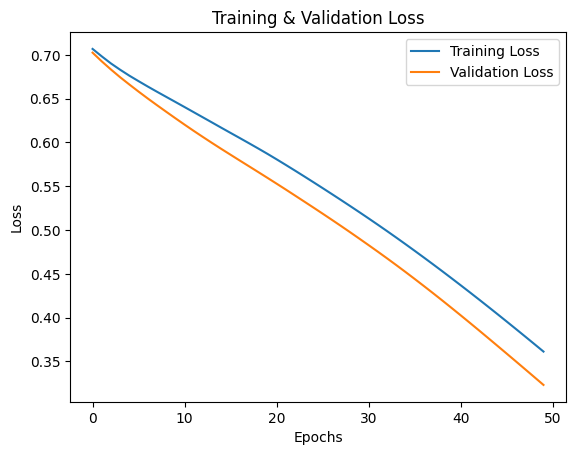

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [15]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
values.append(accuracy)
values

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5265 - loss: 0.6961 - val_accuracy: 0.9615 - val_loss: 0.6685
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9360 - loss: 0.6732 - val_accuracy: 0.9615 - val_loss: 0.6452
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9697 - loss: 0.6519 - val_accuracy: 1.0000 - val_loss: 0.6222
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9909 - loss: 0.6289 - val_accuracy: 1.0000 - val_loss: 0.6001
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9941 - loss: 0.6094 - val_accuracy: 1.0000 - val_loss: 0.5784
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9881 - loss: 0.5887 - val_accuracy: 1.0000 - val_loss: 0.5557
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9909 - loss: 0.5662 - val_accuracy: 1.0000 - val_loss: 0.5322
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9962 - loss: 0.5435 - val_accuracy: 1.0000 - val_loss: 0.5074


[0.939393937587738, 0.939393937587738]

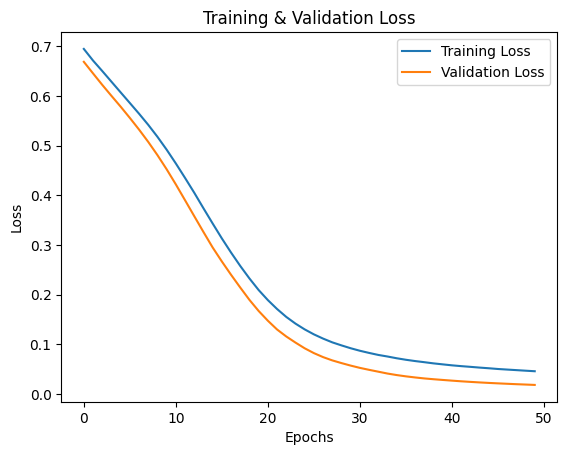

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [17]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2) # Stochiastic Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
values.append(accuracy)
values

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.5921 - val_accuracy: 0.9231 - val_loss: 0.2263
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1257 - val_accuracy: 0.9231 - val_loss: 0.0973
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0523 - val_accuracy: 0.9615 - val_loss: 0.0561
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9549 - loss: 0.0847 - val_accuracy: 1.0000 - val_loss: 0.0444
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9816 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 0.0363
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0404 - val_accuracy: 1.0000 - val_loss: 0.0295
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 1.

[0.939393937587738, 0.939393937587738, 0.939393937587738]

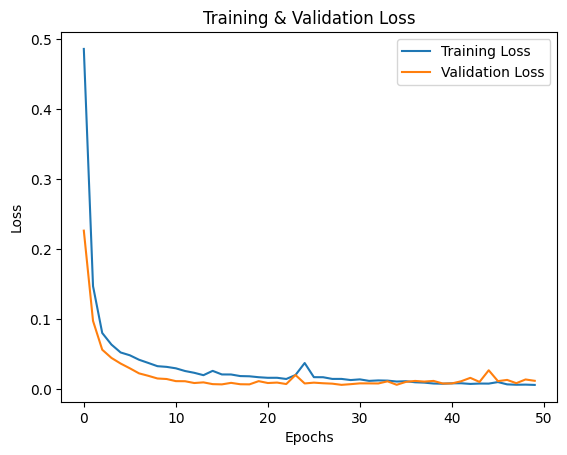

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

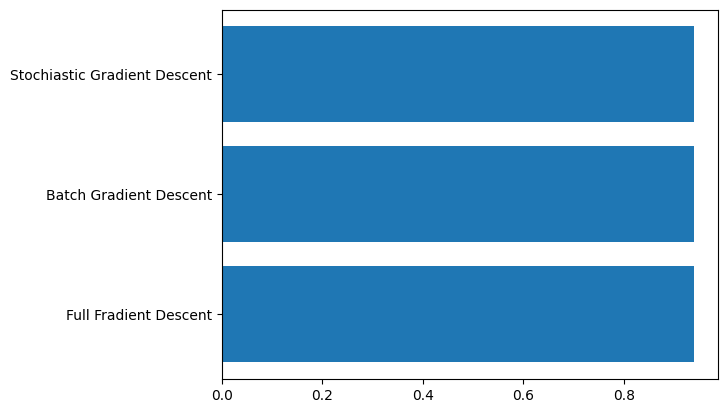

In [19]:
labels = ["Full Fradient Descent", "Batch Gradient Descent", "Stochiastic Gradient Descent"]
plt.barh(labels, values)
plt.show()

In [20]:
# MLP Model
from tensorflow.keras.layers import LeakyReLU
def create_model():
    model = Sequential([
        Dense(64, activation= 'tanh', input_shape=(X_train.shape[1],)),
        Dense(32),
        LeakyReLU(alpha=0.05),
        Dense(1, activation="sigmoid")
    ])

    return model

In [21]:
values = []

In [22]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/50


c:\Users\ASHWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4889 - loss: 0.6884 - val_accuracy: 0.9231 - val_loss: 0.6230
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9359 - loss: 0.6310 - val_accuracy: 0.9615 - val_loss: 0.5719
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9109 - loss: 0.5893 - val_accuracy: 0.9615 - val_loss: 0.5290
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9262 - loss: 0.5475 - val_accuracy: 0.9615 - val_loss: 0.4895
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9272 - loss: 0.5129 - val_accuracy: 0.9615 - val_loss: 0.4526
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9262 - loss: 0.4768 - val_accuracy: 0.9615 - val_loss: 0.4156
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9418 - loss: 0.4373 - val_accuracy: 0.9615 - val_loss: 0.3806
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9418 - loss: 0.4139 - val_accuracy: 0.9615 - val_loss: 0.3475
Epoch 9/50


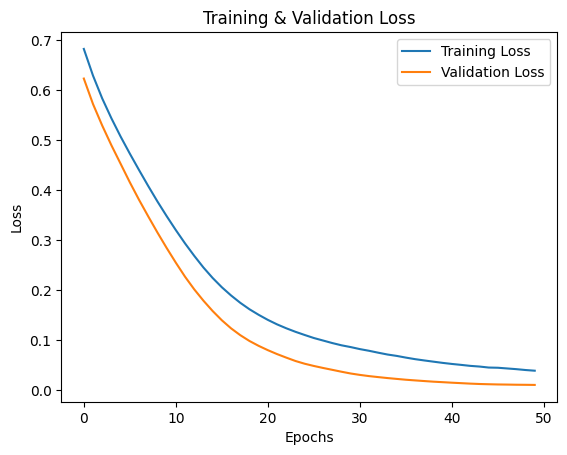

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [24]:
# Regularization!
from tensorflow.keras.layers import Dropout

def create_model():
    model = Sequential([
        Dense(64, activation= 'tanh', input_shape=(X_train.shape[1],)),
        Dropout(0.3), # Try adding dropouts
        Dense(32),
        LeakyReLU(alpha=0.05),
        Dense(1, activation="sigmoid")
    ])

    return model

In [25]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6189 - loss: 0.7038 - val_accuracy: 0.9615 - val_loss: 0.6154
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8426 - loss: 0.6527 - val_accuracy: 0.9615 - val_loss: 0.5695
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8847 - loss: 0.5996 - val_accuracy: 0.9615 - val_loss: 0.5240
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8778 - loss: 0.5694 - val_accuracy: 0.9615 - val_loss: 0.4811
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8719 - loss: 0.5240 - val_accuracy: 0.9615 - val_loss: 0.4397
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8510 - loss: 0.4963 - val_accuracy: 0.9615 - val_loss: 0.4002
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8910 - loss: 0.4425 - val_accuracy: 0.9615 - val_loss: 0.3614
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8858 - loss: 0.4109 - val_accuracy: 0.9615 - val_loss: 0.3239


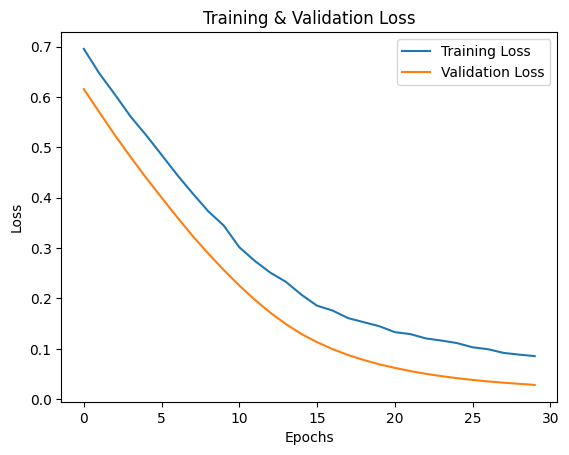

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [27]:
# Regularization using Lasso-Regulators
from tensorflow.keras.regularizers import l1_l2
def create_model():
    model = Sequential([
        Dense(64, activation= 'tanh', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.3), # Try adding dropouts
        Dense(32, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
        Dropout(0.3),
        LeakyReLU(alpha=0.05),
        Dense(1, activation="sigmoid")
    ])

    return model

In [28]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7689 - loss: 0.7069 - val_accuracy: 0.9615 - val_loss: 0.6378
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8573 - loss: 0.6693 - val_accuracy: 0.9615 - val_loss: 0.6017
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9045 - loss: 0.6191 - val_accuracy: 0.9615 - val_loss: 0.5677
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8973 - loss: 0.5933 - val_accuracy: 0.9615 - val_loss: 0.5333
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9057 - loss: 0.5632 - val_accuracy: 0.9615 - val_loss: 0.4962
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9025 - loss: 0.5302 - val_accuracy: 0.9615 - val_loss: 0.4589
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9359 - loss: 0.4856 - val_accuracy: 0.9615 - val_loss: 0.4221
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9147 - loss: 0.4691 - val_accuracy: 0.9615 - val_loss: 0.3868


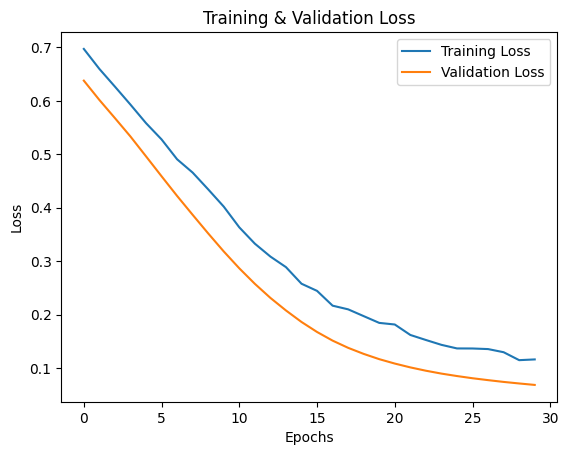

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

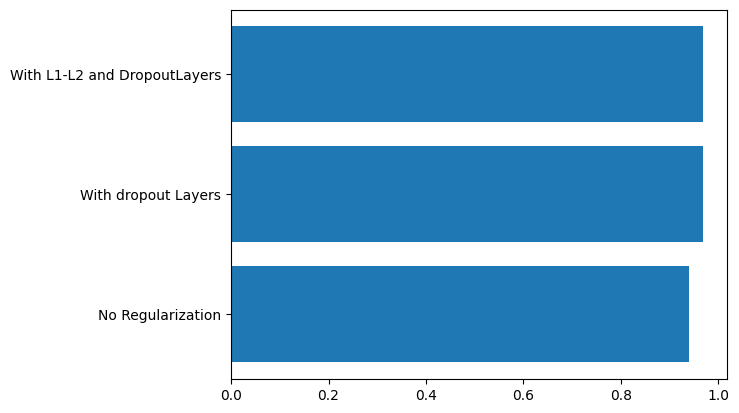

In [30]:
labels = ["No Regularization", "With dropout Layers", "With L1-L2 and DropoutLayers"]
plt.barh(labels, values)
plt.show()

Learning Rate

In [31]:
values = []

In [32]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 1e-3)
model = create_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7066 - loss: 0.7261 - val_accuracy: 0.9231 - val_loss: 0.6735
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8931 - loss: 0.6832 - val_accuracy: 1.0000 - val_loss: 0.6360
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9206 - loss: 0.6447 - val_accuracy: 1.0000 - val_loss: 0.5999
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9293 - loss: 0.6104 - val_accuracy: 1.0000 - val_loss: 0.5665
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9053 - loss: 0.5860 - val_accuracy: 1.0000 - val_loss: 0.5337
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9540 - loss: 0.5451 - val_accuracy: 1.0000 - val_loss: 0.5018
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8998 - loss: 0.5377 - val_accuracy: 1.0000 - val_loss: 0.4702
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9304 - loss: 0.4957 - val_accuracy: 1.0000 - val_loss: 0.4359


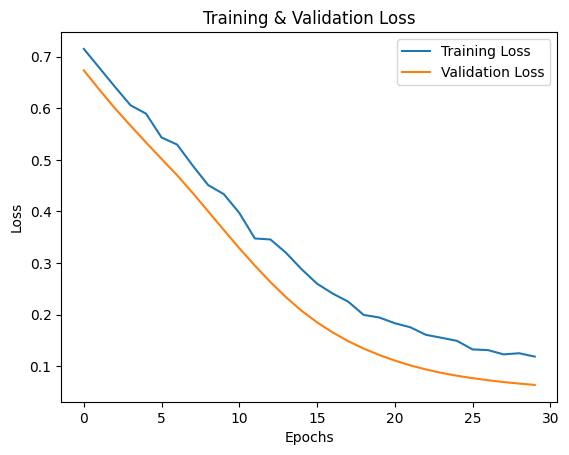

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [34]:
optimizer = Adam(learning_rate = 1e-4)
model = create_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.1992 - loss: 0.7533 - val_accuracy: 0.1538 - val_loss: 0.7416
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1870 - loss: 0.7667 - val_accuracy: 0.1538 - val_loss: 0.7374
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2239 - loss: 0.7453 - val_accuracy: 0.1538 - val_loss: 0.7331
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2935 - loss: 0.7396 - val_accuracy: 0.1538 - val_loss: 0.7291
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3990 - loss: 0.7319 - val_accuracy: 0.2308 - val_loss: 0.7254
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3963 - loss: 0.7338 - val_accuracy: 0.2308 - val_loss: 0.7216
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4037 - loss: 0.7378 - val_accuracy: 0.3077 - val_loss: 0.7181
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5135 - loss: 0.7253 - val_accuracy: 0.3846 - val_loss: 0.7146

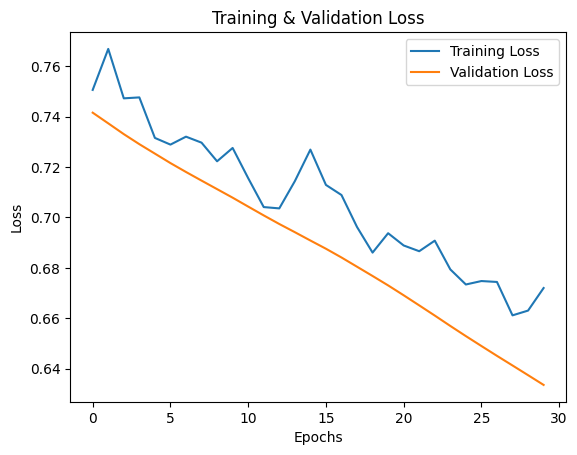

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [36]:
optimizer = Adam(learning_rate = 1e-5)
model = create_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2) # Batch Gradient Descent

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
values.append(accuracy)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.3300 - loss: 0.7337 - val_accuracy: 0.1923 - val_loss: 0.7663
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3425 - loss: 0.7548 - val_accuracy: 0.1923 - val_loss: 0.7658
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3419 - loss: 0.7485 - val_accuracy: 0.1923 - val_loss: 0.7653
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2737 - loss: 0.7512 - val_accuracy: 0.1923 - val_loss: 0.7648
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2841 - loss: 0.7522 - val_accuracy: 0.1923 - val_loss: 0.7643
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2333 - loss: 0.7507 - val_accuracy: 0.1923 - val_loss: 0.7639
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4123 - loss: 0.7434 - val_accuracy: 0.1923 - val_loss: 0.7634
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3026 - loss: 0.7580 - val_accuracy: 0.1923 - val_loss: 0.7629


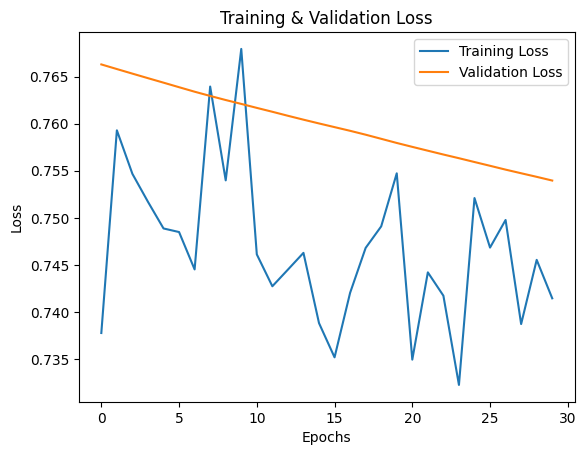

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

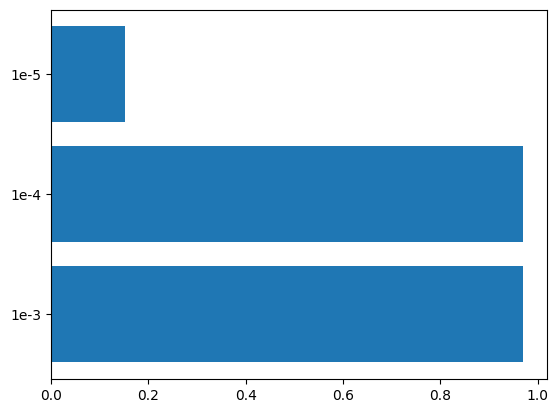

In [38]:
labels = ['1e-3', '1e-4', '1e-5']
plt.barh(labels, values)
plt.show()

From the observations we see <br>
 - Model with batch Gradient Descent of 32 is good (batch_size = 32) <br>
 - Model with epochs = 30 is better (epochs = 30) <br>
 - Model with leaky_relu and tanh seems better <br>
 - Model with learning rat eof 1e-3 is good by the loss curve<br>

In [39]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import LeakyReLU
def create_model():
    model = Sequential([
        Dense(64, activation="tanh", input_shape=(X_train.shape[1], ), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), 
        Dropout(0.4),
        Dense(32, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        LeakyReLU(alpha=0.05),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ])

    return model

In [40]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-3)

model = create_model()
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print("Final Accuracy of the model:", round(accuracy, 4)*100, " %")

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8392 - loss: 0.9677 - val_accuracy: 1.0000 - val_loss: 0.9200
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9022 - loss: 0.9468 - val_accuracy: 1.0000 - val_loss: 0.8784
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9241 - loss: 0.8926 - val_accuracy: 1.0000 - val_loss: 0.8379
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9185 - loss: 0.8427 - val_accuracy: 1.0000 - val_loss: 0.7971
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8841 - loss: 0.8273 - val_accuracy: 1.0000 - val_loss: 0.7559
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9363 - loss: 0.7779 - val_accuracy: 1.0000 - val_loss: 0.7150
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9450 - loss: 0.7487 - val_accuracy: 1.0000 - val_loss: 0.6746
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9415 - loss: 0.7013 - val_accuracy: 1.0000 - val_loss: 0.6345


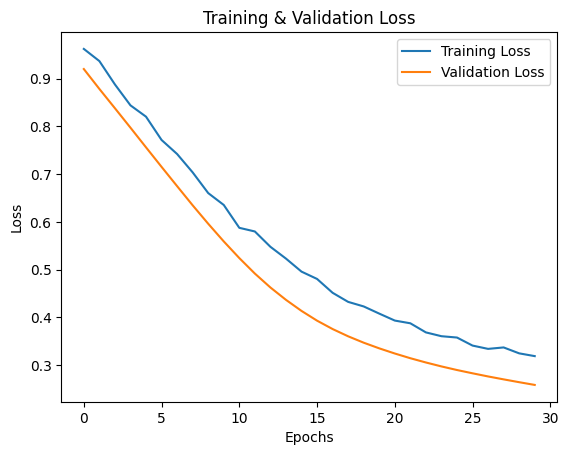

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()